In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

directory_path = '/content/drive/MyDrive/Major Project/MAIN DATA/CONTROL'

if os.path.exists(directory_path):
    print(f"Contents of {directory_path}:")
    for item in os.listdir(directory_path):
        print(item)
else:
    print(f"Directory not found: {directory_path}")

Contents of /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL:
Phase1_validation


In [ ]:
import os

directory_path = '/content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation'

if os.path.exists(directory_path):
    print(f"Contents of {directory_path}:")
    for item in os.listdir(directory_path):
        print(item)
else:
    print(f"Directory not found: {directory_path}")

Contents of /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation:
GPR55_receptor.pdbqt
AM251_control.pdbqt
pubchem_am251.pdbqt
conf_target_P0.txt
conf_target_P1.txt
conf_target_P2.txt
orginal_config_validation.txt
conf_target_P3.txt
conf_target_P4.txt
conf_target_P5.txt
results


In [ ]:

!ls -a

.  ..  .config	drive  sample_data


In [ ]:
!lscpu

Architecture:                x86_64
  CPU op-mode(s):            32-bit, 64-bit
  Address sizes:             52 bits physical, 57 bits virtual
  Byte Order:                Little Endian
CPU(s):                      44
  On-line CPU(s) list:       0-43
Vendor ID:                   AuthenticAMD
  Model name:                AMD EPYC 9B14
    CPU family:              25
    Model:                   17
    Thread(s) per core:      2
    Core(s) per socket:      22
    Socket(s):               1
    Stepping:                1
    BogoMIPS:                5199.99
    Flags:                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pg
                             e mca cmov pat pse36 clflush mmx fxsr sse sse2 ht s
                             yscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constan
                             t_tsc rep_good nopl nonstop_tsc cpuid extd_apicid t
                             sc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse
                             4_1

In [ ]:
from google.colab import drive
import os

print("Mounting Google Drive...")
drive.mount('/content/drive')

# Set up working directory in Drive
GDRIVE_BASE = "/content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation"

print(f"\n✓ Google Drive mounted!")
print(f"✓ Working directory: {GDRIVE_BASE}")
print(f"\nUsing existing files from: {GDRIVE_BASE}/")


Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Google Drive mounted!
✓ Working directory: /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation

Using existing files from: /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation/


In [ ]:

import os

print("Checking for required input files in Google Drive...")
print(f"Location: {GDRIVE_BASE}/\n")

required_files = [
    "GPR55_receptor.pdbqt",
    "AM251_control.pdbqt",
    "pubchem_am251.pdbqt",
    "conf_target_P0.txt",
    "conf_target_P1.txt",
    "conf_target_P2.txt",
    "conf_target_P3.txt",
    "conf_target_P4.txt",
    "conf_target_P5.txt"
]

missing_files = []
found_files = []

for file in required_files:
    filepath = os.path.join(GDRIVE_BASE, file)
    if os.path.exists(filepath):
        size = os.path.getsize(filepath)
        found_files.append(file)
        print(f"✓ {file:<30} ({size:,} bytes)")
    else:
        missing_files.append(file)
        print(f"✗ {file:<30} MISSING!")

print(f"\nFound: {len(found_files)}/{len(required_files)} files")

if missing_files:
    print(f"\n⚠️  ERROR: Missing {len(missing_files)} files!")
    print(f"\nPlease upload these files to {GDRIVE_BASE}/:")
    for f in missing_files:
        print(f"  - {f}")
    print("\nThen re-run this cell.")
else:
    print("\n✓ All required files found! You can proceed to the next cell.")

# ============================================================================
# CELL 3: Check System Resources & Install Software
# ============================================================================

print("="*80)
print("SYSTEM INFORMATION")
print("="*80)
!lscpu | grep -E "^CPU\(s\)|Model name|Thread|Core|Socket"
print("")
!free -h
print("")

print("="*80)
print("INSTALLING AUTODOCK VINA")
print("="*80)

Checking for required input files in Google Drive...
Location: /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation/

✓ GPR55_receptor.pdbqt           (204,683 bytes)
✓ AM251_control.pdbqt            (3,169 bytes)
✓ pubchem_am251.pdbqt            (3,139 bytes)
✓ conf_target_P0.txt             (457 bytes)
✓ conf_target_P1.txt             (402 bytes)
✓ conf_target_P2.txt             (415 bytes)
✓ conf_target_P3.txt             (435 bytes)
✓ conf_target_P4.txt             (370 bytes)
✓ conf_target_P5.txt             (366 bytes)

Found: 9/9 files

✓ All required files found! You can proceed to the next cell.
SYSTEM INFORMATION
CPU(s):                                  44
Model name:                              AMD EPYC 9B14
Thread(s) per core:                      2
Core(s) per socket:                      22
Socket(s):                               1

               total        used        free      shared  buff/cache   available
Mem:           172Gi       1.7Gi      

In [ ]:
!pip install -q pandas matplotlib seaborn numpy
print("✓ Python packages installed!")

✓ Python packages installed!


In [ ]:
print("Installing AutoDock Vina...")

# Install dependencies
!apt-get update -qq
!apt-get install -y -qq wget

# Download and install Vina 1.2.5
!wget -q https://github.com/ccsb-scripps/AutoDock-Vina/releases/download/v1.2.5/vina_1.2.5_linux_x86_64 -O vina
!chmod +x vina
!mv vina /usr/local/bin/

# Install GNU Parallel for better job management
!apt-get install -y -qq parallel

# Verify installation
!vina --version

print("✓ AutoDock Vina installed successfully!")


Installing AutoDock Vina...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 
E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 
AutoDock Vina v1.2.5
✓ AutoDock Vina installed successfully!


In [ ]:

vina_script = f"""#!/bin/bash

# AutoDock Vina - Phase 1 Validation (Google Drive Version)
# Results saved to: {GDRIVE_BASE}/results/

# ============ CONFIGURATION ============
WORK_DIR="{GDRIVE_BASE}"
cd "$WORK_DIR" || exit 1

RECEPTOR="GPR55_receptor.pdbqt"
LIGANDS=("AM251_control.pdbqt" "pubchem_am251.pdbqt")
LIGAND_NAMES=("AM251_control" "AM251_pubchem")
NUM_RUNS=100
NUM_MODES=45
MAX_PARALLEL_JOBS=40  # Using 40 of 44 cores

# Target configurations
declare -a TARGETS=(
    "P0:conf_target_P0.txt:Orthosteric_Keyhole"
    "P1:conf_target_P1.txt:Side_Pocket"
    "P2:conf_target_P2.txt:Interface_Region"
    "P3:conf_target_P3.txt:Allosteric_PPI"
    "P4:conf_target_P4.txt:Lower_Pocket"
    "P5:conf_target_P5.txt:Surface_Groove"
)

# ============ SETUP ============
mkdir -p results/{{raw_outputs,aggregated,analysis,logs}}
JOBLIST_FILE="results/joblist.txt"
> "$JOBLIST_FILE"

TIMESTAMP=$(date '+%Y%m%d_%H%M%S')
MASTER_LOG="results/logs/master_log_${{TIMESTAMP}}.log"
exec > >(tee -a "$MASTER_LOG") 2>&1

echo "Working directory: $WORK_DIR"
echo "Master log file: $MASTER_LOG"
echo "Started at: $(date)"
echo ""

# ============ FUNCTIONS ============

check_existing_results() {{
    echo "Checking for existing results..."
    local completed=0
    local total=0

    for i in "${{!LIGANDS[@]}}"; do
        ligand_name="${{LIGAND_NAMES[$i]}}"

        for target in "${{TARGETS[@]}}"; do
            IFS=':' read -r target_id _ target_name <<< "$target"

            local output_dir="results/raw_outputs/${{ligand_name}}_${{target_id}}_${{target_name}}"

            for run in $(seq 1 $NUM_RUNS); do
                ((total++))
                local output_file="${{output_dir}}/run_${{run}}.pdbqt"

                if [ -f "$output_file" ] && [ -s "$output_file" ]; then
                    ((completed++))
                fi
            done
        done
    done

    echo "Found $completed completed jobs out of $total total jobs"
    echo "Remaining jobs: $((total - completed))"
    echo ""

    EXISTING_COMPLETED=$completed
}}

generate_joblist() {{
    echo "Generating job list (skipping completed runs)..."

    local skipped=0
    local added=0

    for i in "${{!LIGANDS[@]}}"; do
        ligand="${{LIGANDS[$i]}}"
        ligand_name="${{LIGAND_NAMES[$i]}}"

        for target in "${{TARGETS[@]}}"; do
            IFS=':' read -r target_id config target_name <<< "$target"

            local output_dir="results/raw_outputs/${{ligand_name}}_${{target_id}}_${{target_name}}"

            for run in $(seq 1 $NUM_RUNS); do
                seed=$((1000 * i + 100 * (${{target_id:1}}) + run))
                local output_file="${{output_dir}}/run_${{run}}.pdbqt"

                if [ ! -f "$output_file" ] || [ ! -s "$output_file" ]; then
                    echo "$ligand|$ligand_name|$target_id|$config|$target_name|$run|$seed" >> "$JOBLIST_FILE"
                    ((added++))
                else
                    ((skipped++))
                fi
            done
        done
    done

    echo "Skipped $skipped completed jobs"
    echo "Added $added jobs to process"
}}

run_vina_job() {{
    local job_line=$1
    IFS='|' read -r ligand ligand_name target_id config target_name run_num seed <<< "$job_line"

    local output_dir="results/raw_outputs/${{ligand_name}}_${{target_id}}_${{target_name}}"
    mkdir -p "$output_dir"

    local output_file="${{output_dir}}/run_${{run_num}}.pdbqt"
    local log_file="${{output_dir}}/run_${{run_num}}.log"
    local error_file="${{output_dir}}/run_${{run_num}}.error"

    if vina --receptor "$RECEPTOR" \\
         --ligand "$ligand" \\
         --config "$config" \\
         --num_modes $NUM_MODES \\
         --seed $seed \\
         --out "$output_file" \\
         > "$log_file" 2> "$error_file"; then

        local best_affinity=$(grep "^   1 " "$log_file" | awk '{{print $2}}')

        # Update progress
        echo "1" >> "$PROGRESS_FILE"
        local completed=$(wc -l < "$PROGRESS_FILE" 2>/dev/null || echo 0)
        local total_done=$((EXISTING_COMPLETED + completed))
        local percent=$(awk "BEGIN {{printf \\"%.1f\\", ($total_done/$TOTAL_JOBS)*100}}")

        # Track best affinity per target
        local best_file="results/.best_${{ligand_name}}_${{target_id}}.txt"
        if [ ! -f "$best_file" ]; then
            echo "999.0" > "$best_file"
        fi

        local current_best=$(cat "$best_file")
        local is_new_best=""

        if (( $(echo "$best_affinity < $current_best" | bc -l) )); then
            echo "$best_affinity" > "$best_file"
            is_new_best=" 🌟 NEW BEST!"
        fi

        # Print to stdout (one line per job)
        printf "[%4d/%d] %5.1f%% | ✓ %s | %s Run_%d | Affinity: %s kcal/mol | Target Best: %s%s\\n" \\
               "$total_done" "$TOTAL_JOBS" "$percent" \\
               "$ligand_name" "$target_id" "$run_num" \\
               "$best_affinity" "$current_best" "$is_new_best"

        [ -s "$error_file" ] || rm -f "$error_file"
    else
        echo "1" >> "$PROGRESS_FILE"
        local completed=$(wc -l < "$PROGRESS_FILE" 2>/dev/null || echo 0)
        local total_done=$((EXISTING_COMPLETED + completed))
        printf "[%4d/%d] ✗ FAILED: %s %s Run%d\\n" \\
               "$total_done" "$TOTAL_JOBS" "$ligand_name" "$target_id" "$run_num"
        return 1
    fi
}}

export -f run_vina_job
export RECEPTOR NUM_MODES PROGRESS_FILE TOTAL_JOBS EXISTING_COMPLETED

# ============ MAIN EXECUTION ============

echo "========================================================================"
echo "     AutoDock Vina - Phase 1 Validation (Google Drive Version)"
echo "========================================================================"
echo "Receptor:           $RECEPTOR"
echo "Ligands:            ${{LIGAND_NAMES[@]}}"
echo "Pockets tested:     ${{#TARGETS[@]}} (P0-P5)"
echo "Runs per pocket:    $NUM_RUNS"
echo "Total dockings:     $(((${{#LIGANDS[@]}} * ${{#TARGETS[@]}} * NUM_RUNS)))"
echo "Parallel jobs:      $MAX_PARALLEL_JOBS / 44 cores"
echo "Results location:   $WORK_DIR/results/"
echo "========================================================================"
echo ""

# Validate files
for file in "$RECEPTOR" "${{LIGANDS[@]}}" conf_target_P*.txt; do
    if [ ! -f "$file" ]; then
        echo "ERROR: Required file not found: $file"
        echo "Please ensure all files are in: $WORK_DIR/"
        exit 1
    fi
done

echo "✓ All input files validated"
echo ""

check_existing_results
generate_joblist

JOBS_TO_RUN=$(wc -l < "$JOBLIST_FILE")
TOTAL_JOBS=$(((${{#LIGANDS[@]}} * ${{#TARGETS[@]}} * NUM_RUNS)))
export TOTAL_JOBS

if [ "$JOBS_TO_RUN" -eq 0 ]; then
    echo "========================================================================"
    echo "✓ All jobs are already completed!"
    echo "========================================================================"
    echo ""
else
    PROGRESS_FILE="results/progress.count"
    > "$PROGRESS_FILE"
    export PROGRESS_FILE

    echo ""
    echo "Starting parallel docking runs..."
    echo "Jobs to process: $JOBS_TO_RUN (resuming from $EXISTING_COMPLETED completed)"
    echo "Using GNU Parallel with $MAX_PARALLEL_JOBS parallel jobs"
    echo "========================================================================"
    echo ""

    START_TIME=$(date +%s)

    # Install bc for floating point comparison if not present
    command -v bc &> /dev/null || apt-get install -y -qq bc

    # Use --line-buffer for immediate output display
    cat "$JOBLIST_FILE" | parallel --line-buffer -j $MAX_PARALLEL_JOBS run_vina_job {{}}
    echo ""

    END_TIME=$(date +%s)
    ELAPSED=$((END_TIME - START_TIME))

    # Print final best scores for each target
    echo ""
    echo "========================================================================"
    echo "                    BEST BINDING AFFINITIES BY TARGET"
    echo "========================================================================"

    for i in "${{!LIGANDS[@]}}"; do
        ligand_name="${{LIGAND_NAMES[$i]}}"
        echo ""
        echo "📊 $ligand_name:"

        for target in "${{TARGETS[@]}}"; do
            IFS=':' read -r target_id _ target_name <<< "$target"
            best_file="results/.best_${{ligand_name}}_${{target_id}}.txt"

            if [ -f "$best_file" ]; then
                best_val=$(cat "$best_file")
                printf "   %s (%s): %s kcal/mol\\n" "$target_id" "$target_name" "$best_val"
            fi
        done
    done

    echo ""
    echo "========================================================================"

    COMPLETED=$(wc -l < "$PROGRESS_FILE" 2>/dev/null || echo 0)
    FAILED_COUNT=$(grep -c "✗ FAILED" "$MASTER_LOG" 2>/dev/null || echo 0)
    SUCCESS_COUNT=$((COMPLETED - FAILED_COUNT))

    # Calculate success rate safely
    if [ $TOTAL_JOBS -gt 0 ]; then
        SUCCESS_RATE=$(awk "BEGIN {{printf \\"%.1f\\", (($EXISTING_COMPLETED + $SUCCESS_COUNT)/$TOTAL_JOBS)*100}}")
    else
        SUCCESS_RATE="0.0"
    fi

    echo ""
    echo "========================================================================"
    echo "✓ All docking runs completed in $ELAPSED seconds ($((ELAPSED / 60)) minutes)"
    echo "========================================================================"
    echo ""
    echo "Summary:"
    echo "  Previously done: $EXISTING_COMPLETED"
    echo "  Newly completed: $SUCCESS_COUNT"
    echo "  Failed:          $FAILED_COUNT"
    echo "  Total done:      $((EXISTING_COMPLETED + SUCCESS_COUNT))"
    echo "  Success rate:    $SUCCESS_RATE%"
    echo ""
    echo "Results saved to: $WORK_DIR/results/"
    echo ""
fi

echo "✓ Docking complete! Check Google Drive for results."
"""

with open('/tmp/run_vina_gdrive.sh', 'w') as f:
    f.write(vina_script)

!chmod +x /tmp/run_vina_gdrive.sh

print("✓ Vina execution script created!")
print(f"✓ Results will be saved to: {GDRIVE_BASE}/results/")


✓ Vina execution script created!
✓ Results will be saved to: /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation/results/


In [ ]:

import time

print("="*80)
print("STARTING AUTODOCK VINA DOCKING")
print("="*80)
print("")
print("Configuration:")
print("  - 2 ligands × 6 pockets × 100 runs = 1200 total dockings")
print("  - 45 binding modes per run")
print("  - 40 parallel jobs on 44-core AMD EPYC")
print("  - Estimated time: ~30-45 minutes")
print(f"  - Results saving to: {GDRIVE_BASE}/results/")
print("")
print("⚠️  IMPORTANT: Keep this tab active to prevent disconnection!")
print("   If disconnected, just re-run this cell - auto-resume will continue.")
print("")
print("="*80)
print("")

start_time = time.time()

!/tmp/run_vina_gdrive.sh

end_time = time.time()
elapsed_minutes = (end_time - start_time) / 60

print("")
print("="*80)
print("DOCKING COMPLETED!")
print("="*80)
print(f"Total time: {elapsed_minutes:.1f} minutes")
print(f"Results saved to: {GDRIVE_BASE}/results/")
print("="*80)

STARTING AUTODOCK VINA DOCKING

Configuration:
  - 2 ligands × 6 pockets × 100 runs = 1200 total dockings
  - 45 binding modes per run
  - 40 parallel jobs on 44-core AMD EPYC
  - Estimated time: ~30-45 minutes
  - Results saving to: /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation/results/

⚠️  IMPORTANT: Keep this tab active to prevent disconnection!
   If disconnected, just re-run this cell - auto-resume will continue.


Working directory: /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation
Master log file: results/logs/master_log_20251118_235257.log
Started at: Tue Nov 18 11:52:57 PM UTC 2025

     AutoDock Vina - Phase 1 Validation (Google Drive Version)
Receptor:           GPR55_receptor.pdbqt
Ligands:            AM251_control AM251_pubchem
Pockets tested:     6 (P0-P5)
Runs per pocket:    100
Total dockings:     1200
Parallel jobs:      40 / 44 cores
Results location:   /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_val

In [ ]:

import pandas as pd
import glob
import os

print("="*80)
print("GENERATING SUMMARY STATISTICS")
print("="*80)
print("")

os.chdir(GDRIVE_BASE)

# First, extract data from log files to CSV
print("Extracting binding affinities from log files...")

for ligand in ['AM251_control', 'AM251_pubchem']:
    for pocket in ['P0', 'P1', 'P2', 'P3', 'P4', 'P5']:
        for pocket_name in ['Orthosteric_Keyhole', 'Side_Pocket', 'Interface_Region',
                           'Allosteric_PPI', 'Lower_Pocket', 'Surface_Groove']:

            output_dir = f"results/raw_outputs/{ligand}_{pocket}_{pocket_name}"
            summary_file = f"results/aggregated/{ligand}_{pocket}_{pocket_name}_summary.csv"

            if not os.path.exists(output_dir):
                continue

            log_files = glob.glob(f"{output_dir}/run_*.log")
            if not log_files:
                continue

            with open(summary_file, 'w') as out:
                out.write("Run_Number,Mode,Affinity_kcal_mol,RMSD_lb,RMSD_ub\n")

                for log_file in log_files:
                    run_num = os.path.basename(log_file).replace('run_', '').replace('.log', '')

                    try:
                        with open(log_file) as f:
                            for line in f:
                                line = line.strip()
                                if line and line[0].isdigit() and '   ' in line:
                                    parts = line.split()
                                    if len(parts) >= 4:
                                        out.write(f"{run_num},{parts[0]},{parts[1]},{parts[2]},{parts[3]}\n")
                    except:
                        continue

print("✓ Extracted binding data to CSV files")
print("")

# Load and analyze
summary_files = glob.glob('results/aggregated/*_summary.csv')

if not summary_files:
    print("⚠️  No summary files found. Check if docking completed successfully.")
else:
    all_results = []

    for f in summary_files:
        df = pd.read_csv(f)
        basename = os.path.basename(f).replace('_summary.csv', '')
        parts = basename.split('_P')
        ligand = parts[0]
        pocket_info = 'P' + parts[1] if len(parts) > 1 else ''
        pocket_parts = pocket_info.split('_', 1)
        pocket_id = pocket_parts[0]
        pocket_name = pocket_parts[1] if len(pocket_parts) > 1 else ''

        df['Ligand'] = ligand
        df['Pocket'] = pocket_id
        df['Pocket_Name'] = pocket_name
        all_results.append(df)

    if all_results:
        combined = pd.concat(all_results, ignore_index=True)

        summary = combined.groupby(['Ligand', 'Pocket', 'Pocket_Name'])['Affinity_kcal_mol'].agg([
            ('Best_Affinity', 'min'),
            ('Mean_Affinity', 'mean'),
            ('Median_Affinity', 'median'),
            ('Std_Affinity', 'std'),
            ('Total_Poses', 'count')
        ]).reset_index()

        summary = summary.sort_values(['Ligand', 'Best_Affinity'])
        summary.to_csv('results/FINAL_SUMMARY.csv', index=False)

        print("="*80)
        print("                     VALIDATION SUMMARY")
        print("="*80)
        print(summary.to_string(index=False))

        # Validation check
        print("\n" + "="*80)
        print("                     VALIDATION CHECK")
        print("="*80)

        for ligand in summary['Ligand'].unique():
            ligand_data = summary[summary['Ligand'] == ligand]
            best_pocket = ligand_data.loc[ligand_data['Best_Affinity'].idxmin(), 'Pocket']
            best_affinity = ligand_data['Best_Affinity'].min()
            p0_affinity = ligand_data[ligand_data['Pocket'] == 'P0']['Best_Affinity'].values[0]

            print(f"\n{ligand}:")
            print(f"  Best binding at: {best_pocket}")
            print(f"  Best affinity: {best_affinity:.2f} kcal/mol")

            if best_pocket == 'P0':
                print(f"  ✓ VALIDATION PASSED: P0 (Orthosteric) shows best binding")
            else:
                delta = p0_affinity - best_affinity
                print(f"  ⚠️  WARNING: {best_pocket} shows better binding than P0")
                print(f"     {best_pocket}: {best_affinity:.2f} kcal/mol")
                print(f"     P0: {p0_affinity:.2f} kcal/mol")
                print(f"     Difference: {delta:.2f} kcal/mol")

        print("\n" + "="*80)
        print(f"✓ Summary saved to: {GDRIVE_BASE}/results/FINAL_SUMMARY.csv")
        print("="*80)


GENERATING SUMMARY STATISTICS

Extracting binding affinities from log files...
✓ Extracted binding data to CSV files

                     VALIDATION SUMMARY
       Ligand Pocket         Pocket_Name  Best_Affinity  Mean_Affinity  Median_Affinity  Std_Affinity  Total_Poses
AM251_control     P0 Orthosteric_Keyhole         -9.458      -2.082964           -2.628     12.260395         4246
AM251_control     P3          Allosteric         -7.702      -4.837034           -5.581     19.602308         4541
AM251_control     P5      Surface_Groove         -7.512      -5.759093           -6.029      2.859639         4541
AM251_control     P4               Lower         -6.938      -4.607898           -5.428      7.714581         4391
AM251_control     P2    Interface_Region         -6.916      -5.077801           -5.505      4.443218         4516
AM251_control     P1                Side         -6.299      -4.569871           -5.094      5.239930         4490
AM251_pubchem     P0 Orthosteric_Keyh

Installing visualization libraries...

✓ Libraries installed!

Generating visualizations...


/tmp/ipython-input-3474724054.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot([ligand_data[ligand_data['Pocket'] == p]['Affinity_kcal_mol'].values
/tmp/ipython-input-3474724054.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_parts = ax.boxplot([ligand_data[ligand_data['Pocket'] == p]['Affinity_kcal_mol'].values


✓ Saved: results/plot1_binding_comparison.png


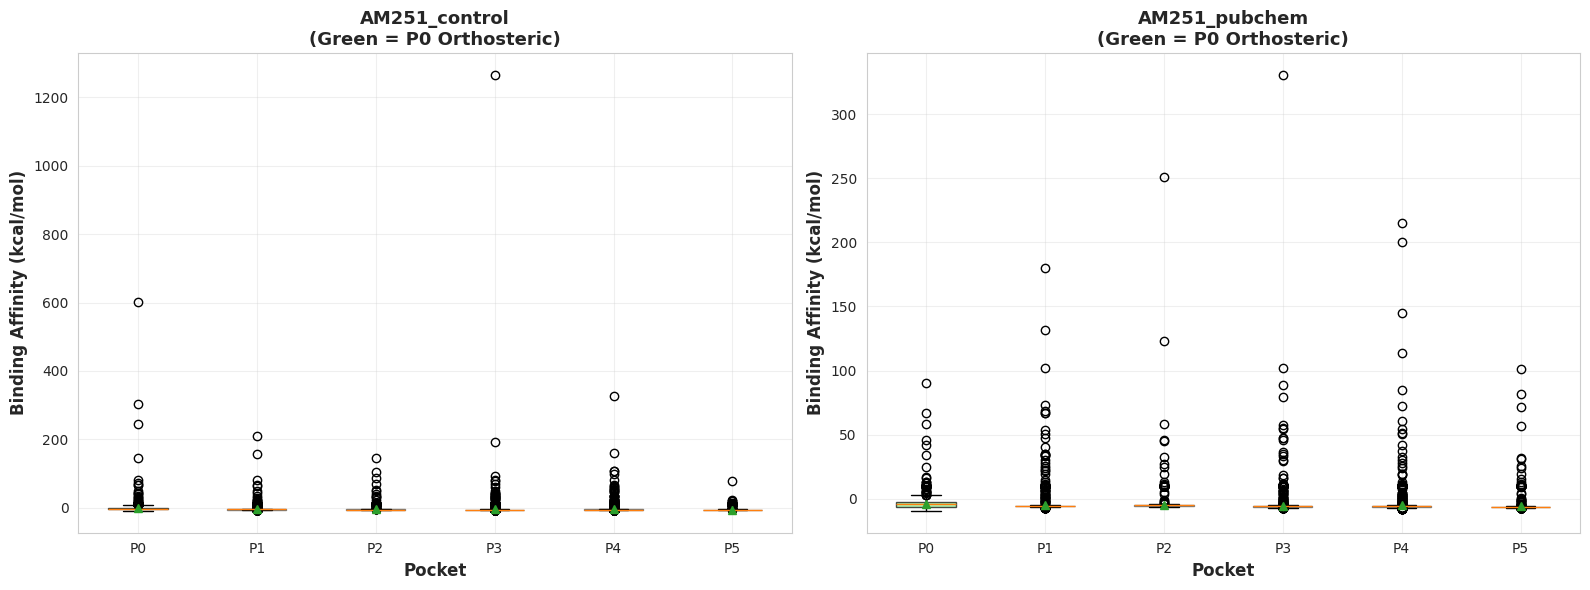

✓ Saved: results/plot2_heatmap.png


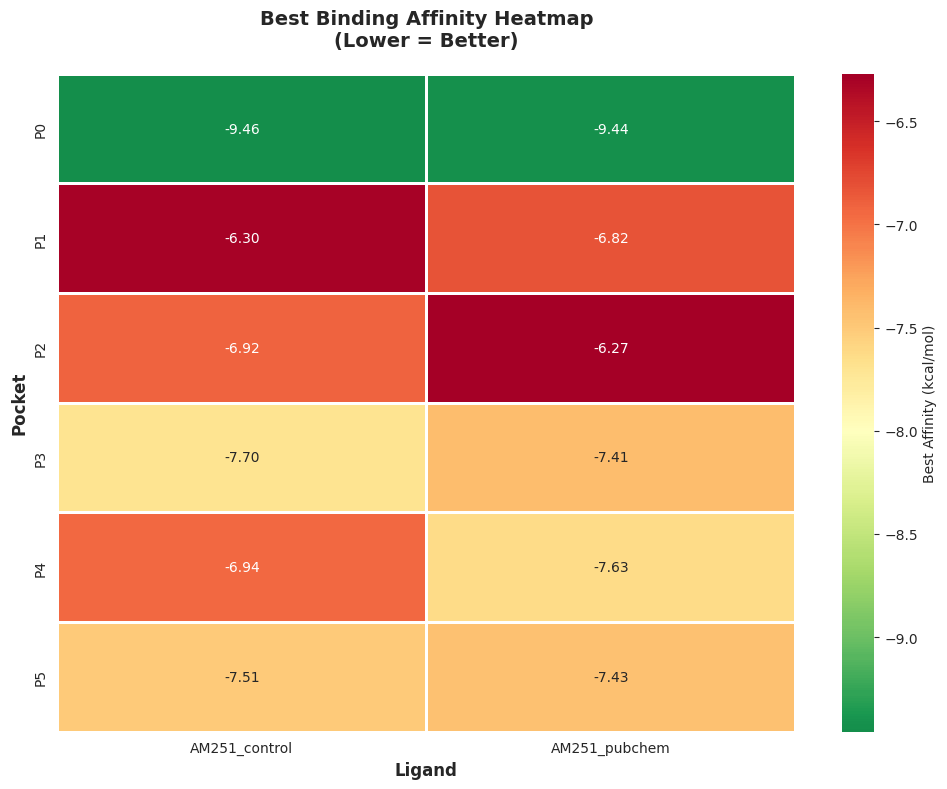

✓ Saved: results/plot3_validation_bars.png


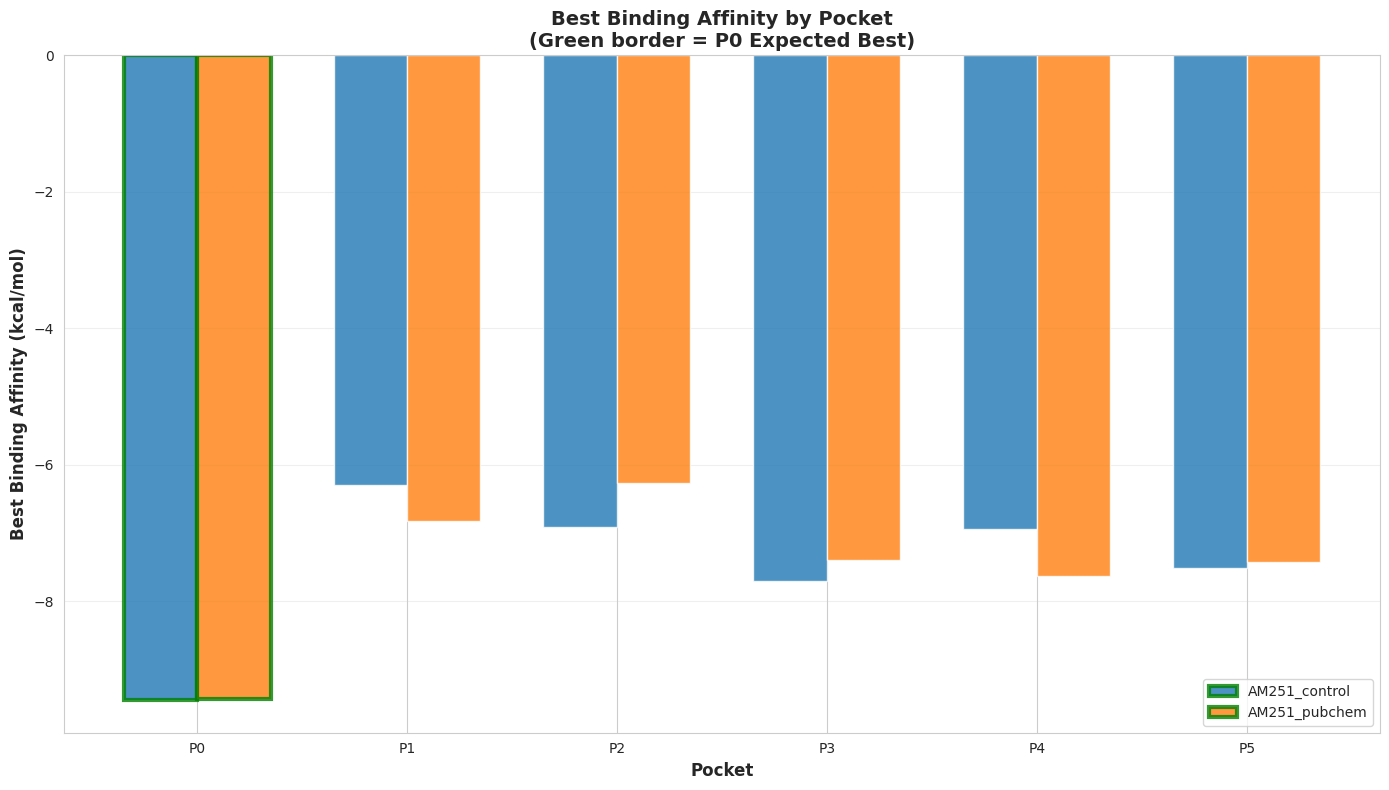


VISUALIZATION COMPLETE
All plots saved to: /content/drive/MyDrive/Major Project/MAIN DATA/CONTROL/Phase1_validation/results/


In [ ]:

print("Installing visualization libraries...")
!pip install -q matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n✓ Libraries installed!")
print("\nGenerating visualizations...")

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

os.chdir(GDRIVE_BASE)

# Reload data
summary_files = glob.glob('results/aggregated/*_summary.csv')
all_results = []

for f in summary_files:
    df = pd.read_csv(f)
    basename = os.path.basename(f).replace('_summary.csv', '')
    parts = basename.split('_P')
    ligand = parts[0]
    pocket_info = 'P' + parts[1] if len(parts) > 1 else ''
    pocket_parts = pocket_info.split('_', 1)
    pocket_id = pocket_parts[0]
    pocket_name = pocket_parts[1] if len(pocket_parts) > 1 else ''

    df['Ligand'] = ligand
    df['Pocket'] = pocket_id
    df['Pocket_Name'] = pocket_name
    all_results.append(df)

combined = pd.concat(all_results, ignore_index=True)
summary = combined.groupby(['Ligand', 'Pocket', 'Pocket_Name'])['Affinity_kcal_mol'].agg([
    ('Best_Affinity', 'min'),
    ('Mean_Affinity', 'mean'),
    ('Median_Affinity', 'median'),
    ('Std_Affinity', 'std'),
    ('Total_Poses', 'count')
]).reset_index()

# Plot 1: Box plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
pockets_order = ['P0', 'P1', 'P2', 'P3', 'P4', 'P5']

for idx, ligand in enumerate(combined['Ligand'].unique()):
    ax = axes[idx]
    ligand_data = combined[combined['Ligand'] == ligand].copy()
    ligand_data['Pocket'] = pd.Categorical(ligand_data['Pocket'], categories=pockets_order, ordered=True)
    ligand_data = ligand_data.sort_values('Pocket')

    box_parts = ax.boxplot([ligand_data[ligand_data['Pocket'] == p]['Affinity_kcal_mol'].values
                             for p in pockets_order],
                            labels=pockets_order,
                            patch_artist=True,
                            showmeans=True)

    for i, box in enumerate(box_parts['boxes']):
        if i == 0:
            box.set_facecolor('lightgreen')
            box.set_alpha(0.7)
        else:
            box.set_facecolor('lightblue')
            box.set_alpha(0.5)

    ax.set_xlabel('Pocket', fontsize=12, fontweight='bold')
    ax.set_ylabel('Binding Affinity (kcal/mol)', fontsize=12, fontweight='bold')
    ax.set_title(f'{ligand}\n(Green = P0 Orthosteric)', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/plot1_binding_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: results/plot1_binding_comparison.png")
plt.show()

# Plot 2: Heatmap
heatmap_data = summary.pivot(index='Pocket', columns='Ligand', values='Best_Affinity')
heatmap_data = heatmap_data.reindex(pockets_order)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn_r',
            center=-8, cbar_kws={'label': 'Best Affinity (kcal/mol)'},
            linewidths=2, linecolor='white', ax=ax)

ax.set_title('Best Binding Affinity Heatmap\n(Lower = Better)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Ligand', fontsize=12, fontweight='bold')
ax.set_ylabel('Pocket', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('results/plot2_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: results/plot2_heatmap.png")
plt.show()

# Plot 3: Bar chart validation
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(pockets_order))
width = 0.35

for idx, ligand in enumerate(summary['Ligand'].unique()):
    ligand_data = summary[summary['Ligand'] == ligand].set_index('Pocket').reindex(pockets_order)
    bars = ax.bar(x + idx*width, ligand_data['Best_Affinity'], width, label=ligand, alpha=0.8)
    bars[0].set_edgecolor('green')
    bars[0].set_linewidth(3)

ax.set_xlabel('Pocket', fontsize=12, fontweight='bold')
ax.set_ylabel('Best Binding Affinity (kcal/mol)', fontsize=12, fontweight='bold')
ax.set_title('Best Binding Affinity by Pocket\n(Green border = P0 Expected Best)', fontsize=14, fontweight='bold')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(pockets_order)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('results/plot3_validation_bars.png', dpi=300, bbox_inches='tight')
print("✓ Saved: results/plot3_validation_bars.png")
plt.show()

print("\n" + "="*80)
print("VISUALIZATION COMPLETE")
print("="*80)
print(f"All plots saved to: {GDRIVE_BASE}/results/")
print("="*80)


In [ ]:

import time
from google.colab import runtime

print("="*80)
print("                      ALL ANALYSIS COMPLETE!")
print("="*80)
print("")
print(f"📁 All results are saved in your Google Drive at:")
print(f"   {GDRIVE_BASE}/results/")
print("")
print("📊 Generated files:")
print("   ├── raw_outputs/              (All .pdbqt and .log files)")
print("   ├── aggregated/               (CSV summaries per ligand-pocket)")
print("   ├── logs/                     (Execution logs)")
print("   ├── FINAL_SUMMARY.csv         (Overall statistics)")
print("   ├── plot1_binding_comparison.png")
print("   ├── plot2_heatmap.png")
print("   └── plot3_validation_bars.png")
print("")
print("✓ All data is permanently saved in your Google Drive")
print("✓ You can access it anytime from any device")
print("✓ If you need to re-run, just execute Cell 5 again (auto-resume works!)")
print("")
print("="*80)
print("Next steps:")
print("  1. Review FINAL_SUMMARY.csv for validation results")
print("  2. Check if P0 (Orthosteric) shows best binding")
print("  3. Examine plots for visual confirmation")
print("  4. Download results from Google Drive if needed")
print("="*80)
print("")
print("")
print("="*80)
print("        🔄 AUTO-TERMINATING SESSION IN 30 SECONDS")
print("="*80)
print("")
print("⚠️  Session will automatically disconnect to free up resources.")
print("   All your results are safely saved in Google Drive!")
print("")
print("   To prevent auto-termination, interrupt this cell now (Ctrl+C)")
print("")

# Countdown before termination
for i in range(30, 0, -5):
    print(f"   Terminating in {i} seconds...")
    time.sleep(5)

print("")
print("="*80)
print("           ✅ TERMINATING SESSION NOW")
print("="*80)
print("")
print("Thank you for using AutoDock Vina on Google Colab!")
print(f"Results location: {GDRIVE_BASE}/results/")
print("")

# Terminate the runtime
runtime.unassign()

In [ ]:
# ============================================================================
# CELL 6B: Enhanced Heatmap Analysis (Publication-Quality)
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

print("="*80)
print("GENERATING ENHANCED HEATMAP ANALYSIS")
print("="*80)
print("")

os.chdir(GDRIVE_BASE)

# ============================================================================
# Configuration
# ============================================================================

# Pocket display names (customize based on your targets)
POCKET_NAMES = {
    'P0': 'Orthosteric',
    'P1': 'Side_Pocket',
    'P2': 'Interface',
    'P3': 'Allosteric_PPI',
    'P4': 'Lower_Pocket',
    'P5': 'Surface_Groove'
}

LIGAND_NAMES = {
    'AM251_control': 'AM251_Control',
    'AM251_pubchem': 'AM251_PubChem'
}

# ============================================================================
# Load and Process Data
# ============================================================================

print("Loading summary files...")
summary_files = glob.glob('results/aggregated/*_summary.csv')

all_results = []
for f in summary_files:
    df = pd.read_csv(f)
    basename = os.path.basename(f).replace('_summary.csv', '')
    parts = basename.split('_P')
    ligand = parts[0]
    pocket_info = 'P' + parts[1] if len(parts) > 1 else ''
    pocket_parts = pocket_info.split('_', 1)
    pocket_id = pocket_parts[0]
    pocket_name = pocket_parts[1] if len(pocket_parts) > 1 else ''

    df['Ligand'] = ligand
    df['Pocket'] = pocket_id
    df['Pocket_Name'] = pocket_name
    all_results.append(df)

combined = pd.concat(all_results, ignore_index=True)
print(f"✓ Loaded {len(combined):,} binding poses")

# Calculate statistics
stats = combined.groupby(['Ligand', 'Pocket', 'Pocket_Name'])['Affinity_kcal_mol'].agg([
    ('Best_Affinity', 'min'),
    ('Mean_Affinity', 'mean'),
    ('Median_Affinity', 'median'),
    ('Std_Affinity', 'std'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q3', lambda x: x.quantile(0.75)),
    ('Total_Poses', 'count')
]).reset_index()

print(f"✓ Calculated statistics for {len(stats)} ligand-pocket combinations")

# ============================================================================
# Create Enhanced Heatmap
# ============================================================================

print("\nGenerating publication-quality heatmap...")

# Map display names
stats['Pocket_Display'] = stats['Pocket'].map(POCKET_NAMES)
stats['Ligand_Display'] = stats['Ligand'].map(LIGAND_NAMES)
stats['Pocket_Display'].fillna(stats['Pocket'], inplace=True)
stats['Ligand_Display'].fillna(stats['Ligand'], inplace=True)

# Create pivot table for heatmap
heatmap_data = stats.pivot(
    index='Ligand_Display',
    columns='Pocket_Display',
    values='Best_Affinity'
)

# Reorder columns logically
column_order = [name for name in POCKET_NAMES.values() if name in heatmap_data.columns]
heatmap_data = heatmap_data[column_order]

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Color map: green (strong) to red (weak)
cmap = sns.diverging_palette(145, 10, s=85, l=45, as_cmap=True)

# Create heatmap
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap=cmap,
    center=-7.0,
    vmin=-10,
    vmax=-4,
    cbar_kws={
        'label': 'Binding Affinity (kcal/mol)',
        'shrink': 0.8,
        'aspect': 30
    },
    linewidths=3,
    linecolor='white',
    square=True,
    ax=ax,
    annot_kws={'fontsize': 13, 'fontweight': 'bold'}
)

# Styling
ax.set_xlabel('Target Site', fontsize=15, fontweight='bold', labelpad=12)
ax.set_ylabel('Ligand', fontsize=15, fontweight='bold', labelpad=12)
ax.set_title(
    'Best Binding Affinities: Ligand-Target Matrix',
    fontsize=18,
    fontweight='bold',
    pad=25
)

plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')

# Get total runs from first entry
total_runs = int(stats['Total_Poses'].iloc[0]) if len(stats) > 0 else 100

# Add caption
fig.text(
    0.5, 0.02,
    f'Properties: Lower (more negative) values indicate stronger binding.\n'
    f'Values shown are the best affinity from {total_runs} docking runs per combination.',
    ha='center',
    fontsize=11,
    style='italic'
)

# Add binding strength legend
legend_elements = [
    plt.Rectangle((0,0),1,1, fc='#2d6a4f', label='Strong binding'),
    plt.Rectangle((0,0),1,1, fc='#f4a261', label='Moderate'),
    plt.Rectangle((0,0),1,1, fc='#a4161a', label='Weak binding')
]

legend_y = -0.15
fig.text(0.20, legend_y, '■ Strong binding', fontsize=11,
         color='#2d6a4f', weight='bold', ha='left')
fig.text(0.50, legend_y, '■ Moderate', fontsize=11,
         color='#f4a261', weight='bold', ha='center')
fig.text(0.80, legend_y, '■ Weak binding', fontsize=11,
         color='#a4161a', weight='bold', ha='right')

plt.tight_layout(rect=[0, 0.10, 1, 0.96])
plt.savefig('results/binding_affinity_matrix.png', dpi=300, bbox_inches='tight', facecolor='white')
print("✓ Saved: results/binding_affinity_matrix.png")
plt.show()

# ============================================================================
# Create Detailed Comparison Table
# ============================================================================

print("\nGenerating detailed comparison table...")

# Add binding strength classification
def classify_binding(affinity):
    if affinity < -8.0:
        return 'Strong'
    elif affinity < -6.0:
        return 'Moderate'
    elif affinity < -4.0:
        return 'Weak'
    else:
        return 'Very Weak'

stats['Binding_Strength'] = stats['Best_Affinity'].apply(classify_binding)

# Create formatted table
comparison_table = stats[[
    'Ligand', 'Pocket', 'Pocket_Name',
    'Best_Affinity', 'Mean_Affinity', 'Median_Affinity',
    'Std_Affinity', 'Binding_Strength', 'Total_Poses'
]].copy()

comparison_table = comparison_table.sort_values(['Ligand', 'Best_Affinity'])
comparison_table.to_csv('results/detailed_comparison_table.csv', index=False, float_format='%.2f')
print("✓ Saved: results/detailed_comparison_table.csv")

# ============================================================================
# Statistical Summary Report
# ============================================================================

print("\nGenerating statistical summary report...")

with open('results/statistical_summary_report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("AutoDock Vina - Statistical Summary Report\n")
    f.write("="*80 + "\n\n")

    for ligand in stats['Ligand'].unique():
        ligand_data = stats[stats['Ligand'] == ligand].copy()
        ligand_data = ligand_data.sort_values('Best_Affinity')

        f.write(f"\n{'='*80}\n")
        f.write(f"LIGAND: {ligand}\n")
        f.write(f"{'='*80}\n\n")

        # Best binding site
        best_row = ligand_data.iloc[0]
        f.write(f"Best Binding Site: {best_row['Pocket']} ({best_row['Pocket_Name']})\n")
        f.write(f"  Best Affinity:      {best_row['Best_Affinity']:.2f} kcal/mol\n")
        f.write(f"  Mean Affinity:      {best_row['Mean_Affinity']:.2f} kcal/mol\n")
        f.write(f"  Median Affinity:    {best_row['Median_Affinity']:.2f} kcal/mol\n")
        f.write(f"  Std Deviation:      {best_row['Std_Affinity']:.2f} kcal/mol\n")
        f.write(f"  Binding Strength:   {best_row['Binding_Strength']}\n\n")

        # All sites ranking
        f.write("Ranking of All Binding Sites:\n")
        f.write("-" * 80 + "\n")
        f.write(f"{'Rank':<6} {'Pocket':<10} {'Site Name':<25} {'Best':<10} {'Mean':<10} {'Std':<8}\n")
        f.write("-" * 80 + "\n")

        for rank, (idx, row) in enumerate(ligand_data.iterrows(), 1):
            f.write(f"{rank:<6} {row['Pocket']:<10} {row['Pocket_Name']:<25} "
                   f"{row['Best_Affinity']:>8.2f}  {row['Mean_Affinity']:>8.2f}  "
                   f"{row['Std_Affinity']:>6.2f}\n")

        f.write("\n")

print("✓ Saved: results/statistical_summary_report.txt")

# ============================================================================
# Display Results
# ============================================================================

print("\n" + "="*80)
print("ENHANCED ANALYSIS SUMMARY")
print("="*80)

# Top 5 best bindings
print("\nTop 5 Best Binding Affinities:")
print("-" * 80)
top_5 = stats.nsmallest(5, 'Best_Affinity')[
    ['Ligand', 'Pocket', 'Pocket_Name', 'Best_Affinity', 'Binding_Strength']
]
print(top_5.to_string(index=False))

# Binding strength distribution
print("\n" + "="*80)
print("Binding Strength Distribution:")
print("-" * 80)
strength_counts = stats['Binding_Strength'].value_counts().sort_index()
for strength, count in strength_counts.items():
    print(f"{strength:<15} {count:>3} combinations")

# Summary by ligand
print("\n" + "="*80)
print("Best Binding Site per Ligand:")
print("-" * 80)
for ligand in stats['Ligand'].unique():
    ligand_data = stats[stats['Ligand'] == ligand]
    best = ligand_data.loc[ligand_data['Best_Affinity'].idxmin()]
    print(f"\n{ligand}:")
    print(f"  Site:     {best['Pocket']} ({best['Pocket_Name']})")
    print(f"  Affinity: {best['Best_Affinity']:.2f} kcal/mol")
    print(f"  Strength: {best['Binding_Strength']}")

print("\n" + "="*80)
print("✓ Enhanced analysis complete!")
print("\nGenerated files:")
print("  - results/binding_affinity_matrix.png (publication-quality heatmap)")
print("  - results/detailed_comparison_table.csv (all statistics)")
print("  - results/statistical_summary_report.txt (detailed report)")
print("="*80)

GENERATING ENHANCED HEATMAP ANALYSIS



NameError: name 'GDRIVE_BASE' is not defined